In [5]:
#-------Plot Chandra photometry data-------#
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from astropy.table import Table
import scipy, pylab
from scipy.integrate import trapz, simps, quad
import math
import astropy
import pyregion
from matplotlib.lines import Line2D
from astropy.io import fits
import matplotlib.cm as cmx
import matplotlib.colors as colors

wittmann = Table.read('wittmann-2017.csv')
netcounts11714 = Table.read('netcounts/11714_netcounts.csv')
netcounts11715 = Table.read('netcounts/11715_netcounts.csv')
netcounts11713 = Table.read('netcounts/11713_netcounts.csv')
songcounts = Table.read('netcounts/song_netcounts.csv')

netcounts1 = np.append(netcounts11713['net_counts'], netcounts11714['net_counts']) 
netcounts1 = np.append(netcounts1, netcounts11715['net_counts'])  
netcounts1 = np.append(netcounts1, songcounts['net_counts'])                                    # all netcount info

yupp1 = np.append(netcounts11713['upper_err'], netcounts11714['upper_err'])   				  # Set upper and lower limits from csv files
yupp1 = np.append(yupp1, netcounts11715['upper_err'])
yupp1 = np.append(yupp1, songcounts['upper_err'])

ylow = np.append(netcounts11713['lower_err'], netcounts11714['lower_err'])
ylow = np.append(ylow, netcounts11715['lower_err'])
ylow1 = np.append(ylow, songcounts['lower_err'])
           
ra1 = np.append(netcounts11713['ra'], netcounts11714['ra'])
ra1 = np.append(ra1, netcounts11715['ra'])
ra1 = np.append(ra1, songcounts['ra'])

dec1 = np.append(netcounts11713['dec'], netcounts11714['dec'])
dec1 = np.append(dec1, netcounts11715['dec'])
dec1 = np.append(dec1, songcounts['dec'])

idarray = np.append(netcounts11713['chandra_ID'], netcounts11714['chandra_ID'])
idarray = np.append(idarray, netcounts11715['chandra_ID'])
idarray = np.append(idarray, (songcounts['chandra_ID']))

#-----define a distance function to get distances in degrees between two objects given their ra,dec-----
def degreedist(ra1, dec1, ra2, dec2):
    ra2 = math.radians(ra2)
    dec2 = math.radians(dec2)
    ra1 = math.radians(ra1)
    dec1 = math.radians(dec1)
    cosdist = math.sin(dec1)*math.sin(dec2) + math.cos(dec1)*math.cos(dec2)*math.cos(ra1 - ra2)
    return math.degrees(math.acos(cosdist))

#-----filter out objects too far away from the target ra, dec of each Chandra Observation's fits file-----
#-----create an array of the indexes that fall within the desired distances
maxdist = 0.116667 # degrees
#maxdist = 2
indxs = []
def fits_file(imagenum):  # takes each file's number and returns a string fits filename
    if int(imagenum) < 1000:
        return 'FITSfiles/acisf00%s_repro_evt2.fits' %imagenum
    if int(imagenum) < 10000:
        return 'FITSfiles/acisf0%s_repro_evt2.fits' %imagenum
    else:
        return 'FITSfiles/acisf%s_repro_evt2.fits' %imagenum
    
len(idarray)


68

In [6]:
indxs = []
for id in range(len(ra1)):
    fname = fits_file(idarray[id])
    hdulist = fits.open(fname)
    hduheader = hdulist[1].header
    ra_targ = hduheader['RA_TARG']
    dec_targ = hduheader['DEC_TARG']
    
    dist = degreedist(ra1[id], dec1[id], ra_targ, dec_targ)
    if dist < maxdist:
        indxs.append(id)

In [7]:
# select attributes from objects within desired threshold
ra = np.zeros(len(indxs))
dec = np.zeros(len(indxs))
yupp = np.zeros(len(indxs))
ylow = np.zeros(len(indxs))
netcounts = np.zeros(len(indxs))

for i in range(len(indxs)):
    netcounts[i] = netcounts1[indxs[i]]
    yupp[i] = yupp1[indxs[i]]
    ylow[i] = ylow1[indxs[i]]
    ra[i] = ra1[indxs[i]]
    dec[i] = dec1[indxs[i]]
    
netcounts_300 = netcounts[0::2]     # separate by energy level (300kev-2000kev, 2000kev-7000kev)
netcounts_2000 = netcounts[1::2]
yupp_300 = yupp[0::2]
yupp_2000 = yupp[1::2]
ylow_300 = ylow[0::2]
ylow_2000 = ylow[1::2]
    
#-----compute distances from NGC1275-----
ra_NGC1275 = 49.95041666
dec_NGC1275 = 41.51138889
distarray = np.zeros(len(ra))
for i in range(len(ra)):
    distarray[i] = degreedist(ra[i], dec[i], ra_NGC1275, dec_NGC1275)

distarray = distarray[0::2]

len(distarray)
len(ra)


32

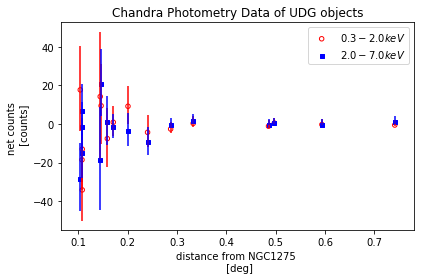

In [8]:
#------make the plot-----
ax1 = pylab.subplot(111)

ax1.scatter(distarray, netcounts_300, s=20, facecolors='none', edgecolors='r', label='$0.3-2.0 keV$')
ax1.scatter(distarray, netcounts_2000, s=20, c = 'b', marker = "s", label = '$2.0-7.0 keV$')

ax1.errorbar(distarray, netcounts_300, yerr=(ylow_300, yupp_300), linestyle='none', ecolor='r')
ax1.errorbar(distarray, netcounts_2000, yerr=(ylow_2000, yupp_2000), linestyle='none', ecolor='b')


#pylab.ylim([40.8, 42.0])
#pylab.xlim([])
plt.title('Chandra Photometry Data of UDG objects')
plt.xlabel('distance from NGC1275 \n [deg]')
plt.ylabel('net counts \n [counts]')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

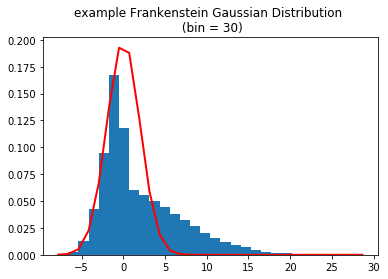

In [65]:
from random import *
sigup = 7 # upper error bound (one sigma)
siglo = 2 # lower error bound (one sigma)
mu = 0  # data point

#fupp = np.exp(-((y-u)/sigup)**2/2) / sigup / np.sqrt(2 * np.pi)   
#flow = np.exp(-((y-u)/siglo)**2/ 2) / siglo / np.sqrt(2 * np.pi)

# define a gaussian type function
def gauss(x, mu, sigma):
    return (np.exp(-((x-mu)/sigma)**2/ 2)) / (sigma*np.sqrt(2 * np.pi))

#def error_distribution(mu, sigup, siglo):
s = []
s = np.asarray(s)
for i in range(10000):           
    rand = uniform(-1, 1) # generate random number between -1 and 1 and use as a coin flip
    if rand == 0:         # if zero, flip again
        rand = uniform(-1, 1) 
    if rand < 0:          # if tails, choose a number from the lower 
        value = -(abs(np.random.normal(0, siglo, 1)))
        
    else:                 # if heads, use upper error bound, sigup
        value = abs(np.random.normal(0, sigup, 1))
    s = np.append(s, mu+value)
        



count, bins, ignored = plt.hist(s, 30, normed=True)
plt.plot(bins, 1/(siglo * np.sqrt(2 * np.pi)) *
                np.exp( - (bins - mu)**2 / (2 * siglo**2) ),
          linewidth=2, color='r')
plt.title('example Frankenstein Gaussian Distribution \n (bin = 30)')
plt.show()


In [10]:
def f_model(x, a, b):
    # pars is an array [a,b] to fit our function's form.
    # function form: f = a/x^2 + b
    return a*(1/(np.array(x))**2) + b

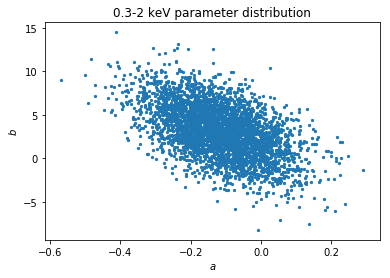

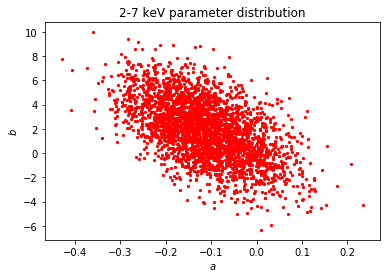

In [71]:
from scipy.optimize import curve_fit

ntrials = 4000       # number of times we want to sample data within th error bands and fit model parameters

x_data = distarray
pararray = []
pararray1 = np.asarray(pararray)
y_data = []
y_data = np.zeros(len(distarray))

for i in range(ntrials):
    for i in range(len(distarray)):
        sigup = yupp_300[i]
        siglo = ylow_300[i]
        mu = netcounts_300[i]
        
        rand = uniform(-1, 1) # generate random number between -1 and 1 and use as a coin flip
        if rand == 0:         # if zero, flip again
            rand = uniform(-1, 1) 
        if rand < 0:          # if tails, choose a number from the lower 
            y_data[i] = mu - (abs(np.random.normal(0, siglo, 1)))   
        else:                 # if heads, use upper error bound, sigup
            y_data[i] = mu + abs(np.random.normal(0, sigup, 1))


    popt, pcov = curve_fit(f_model, x_data, y_data)
    pararray1 = np.append(pararray1, popt)
    
pararray2 = []
pararray2 = np.asarray(pararray2)

for i in range(ntrials):
    for i in range(len(distarray)):
        sigup = yupp_2000[i]
        siglo = ylow_2000[i]
        mu = netcounts_2000[i]
        
        rand = uniform(-1, 1) # generate random number between -1 and 1 and use as a coin flip
        if rand == 0:         # if zero, flip again
            rand = uniform(-1, 1) 
        if rand < 0:          # if tails, choose a number from the lower 
            y_data[i] = mu - (abs(np.random.normal(0, siglo, 1)))   
        else:                 # if heads, use upper error bound, sigup
            y_data[i] = mu + abs(np.random.normal(0, sigup, 1))


    popt, pcov = curve_fit(f_model, x_data, y_data)
    pararray2 = np.append(pararray2, popt)


    

#plt.plot(x_data, f_model(x_data, *popt), 'r-', label='fit')
fig1 = plt.figure()                # create common figure
fig2 = plt.figure()
ax1 = fig1.add_subplot(111)

a_array300 = pararray1[0::2]
b_array300 = pararray1[1::2]

par300 = a_array300, b_array300
pars300 = np.stack(par300, axis=1)                # stack the a and b parameters for easy access

pars300 = pars300[1000:]

ax1.scatter(a_array300, b_array300, s=20, marker='.')
ax1.set_xlabel('$a$')
ax1.set_ylabel('$b$')
ax1.set_title("0.3-2 keV parameter distribution")



a_array2000 = pararray2[0::2]
a_array2000 = a_array2000[1000:]

b_array2000 = pararray2[1::2]
b_array2000 = b_array2000[1000:]

par2000 = a_array2000, b_array2000
pars2000 = np.stack(par2000, axis=1)

pars2000 = pars2000[1000:]

ax2 = fig2.add_subplot(111)
ax2.scatter(a_array2000, b_array2000, s=20, color='r', marker='.')
ax2.set_xlabel('$a$')
ax2.set_ylabel('$b$')
ax2.set_title("2-7 keV parameter distribution")
plt.show()

In [72]:
from IPython import display

low,med,hi = np.percentile(pars300, [16, 50, 84], axis=0)
upper, lower = hi-med, med-low

disp_str1 = ""
for i,name in enumerate(['a_.3', 'b_.3']):
        fmt_str = '{name}={val:.2f}^{{+{plus:.2f}}}_{{-{minus:.2f}}}'
        disp_str1 += fmt_str.format(name=name, val=med[i], plus=upper[i], minus=lower[i])
        disp_str1 += r'\quad '

disp_str1 = "${}$".format(disp_str1)
display.Latex(data=disp_str1)



<IPython.core.display.Latex object>

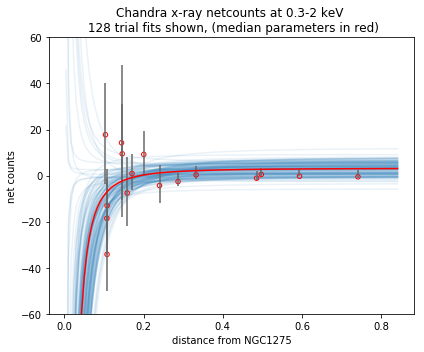

In [73]:
plt.figure(figsize=(6,5))

plt.scatter(distarray, netcounts_300, s=20, facecolors='none', edgecolors='r', label='$0.3-2.0 keV$')
plt.errorbar(distarray, netcounts_300, yerr=(ylow_300, yupp_300), linestyle='none', ecolor='#666666')


x_grid = np.linspace(distarray.min()-0.1, distarray.max()+0.1, 128)
for pars in range(len(a_array300[:128])):
    plt.plot(x_grid, f_model(x_grid, a_array300[pars], b_array300[pars]), 
             marker='', linestyle='-', color='#3182bd', alpha=0.1, zorder=-10)

plt.plot(x_grid, f_model(x_grid, med[0], med[1]), color='r')
plt.ylim(-60, 60)    
plt.xlabel('distance from NGC1275')
plt.ylabel('net counts')
plt.title('Chandra x-ray netcounts at 0.3-2 keV \n 128 trial fits shown, (median parameters in red)')
plt.tight_layout()
plt.show()

In [74]:
low,med,hi = np.percentile(pars2000, [16, 50, 84], axis=0)
upper, lower = hi-med, med-low

disp_str = ""
for i,name in enumerate(['a_2', 'b_2']):
        fmt_str = '{name}={val:.2f}^{{+{plus:.2f}}}_{{-{minus:.2f}}}'
        disp_str += fmt_str.format(name=name, val=med[i], plus=upper[i], minus=lower[i])
        disp_str += r'\quad '

disp_str = "${}$".format(disp_str)
display.Latex(data= disp_str)

<IPython.core.display.Latex object>

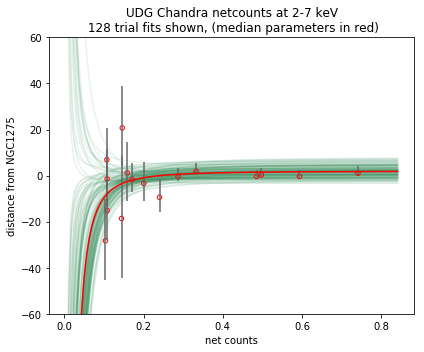

In [75]:
plt.figure(figsize=(6,5))

plt.scatter(distarray, netcounts_2000, s=20, facecolors='none', edgecolors='r', label='$0.3-2.0 keV$')
plt.errorbar(distarray, netcounts_2000, yerr=(ylow_2000, yupp_2000), linestyle='none', ecolor='#666666')


x_grid = np.linspace(distarray.min()-0.1, distarray.max()+0.1, 128)
for pars in range(len(a_array2000[:128])):
    plt.plot(x_grid, f_model(x_grid, a_array2000[pars], b_array2000[pars]), 
             marker='', linestyle='-', color='#2e8b57', alpha=0.1, zorder=-10)
plt.plot(x_grid, f_model(x_grid, med[0], med[1]), color='r')
plt.ylim(-60, 60)    
plt.xlabel('net counts')
plt.ylabel('distance from NGC1275')
plt.title('UDG Chandra netcounts at 2-7 keV\n 128 trial fits shown, (median parameters in red)')
plt.tight_layout()
plt.show()

In [45]:
def decay_model(x, a, b):
    #pars = np.asarray(pars)
    # pars is an array [a,b] to fit our function's form.
    # function form: f = a/x^2 + b
    return a*(1 / ((np.array(x))**2)) + b

In [46]:

vGuess = [-1.0,1.0]
ntrials = 4000

aFitPars = np.array([])

In [47]:
aFitSameTimes = np.array([])
x_data = distarray
y_data = np.zeros(len(distarray))
for i in range(4000):
    
    
    for i in range(len(distarray)):
        sigup = yupp_300[i]
        siglo = ylow_300[i]
        mu = netcounts_300[i]
        
        rand = uniform(-1, 1) # generate random number between -1 and 1 and use as a coin flip
        if rand == 0:         # if zero, flip again
            rand = uniform(-1, 1) 
        if rand < 0:          # if tails, choose a number from the lower 
            y_data[i] = mu - (abs(np.random.normal(0, siglo, 1)))   
        else:                 # if heads, use upper error bound, sigup
            y_data[i] = mu + abs(np.random.normal(0, sigup, 1))

    
    try:
        vTrial,aCova = curve_fit(decay_model, x_data, y_data, vGuess)
    except:
        dumdum = 1
        continue
        
    # stack the ith trial onto the running sample:
    if np.size(aFitSameTimes) < 1:
        aFitSameTimes=np.copy(vTrial)
    else:
        aFitSameTimes = np.vstack((aFitSameTimes, vTrial))


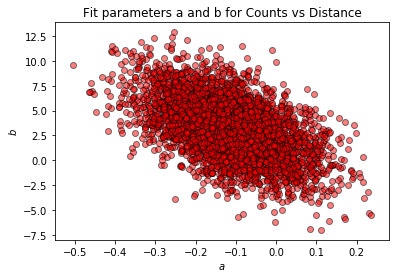

In [48]:
plt.scatter(aFitSameTimes[:,0], aFitSameTimes[:,1],c='r', s=36, edgecolor='k', alpha=0.5)
plt.xlabel('$a$')
plt.ylabel('$b$')
plt.title('Fit parameters a and b for Counts vs Distance')
plt.show()

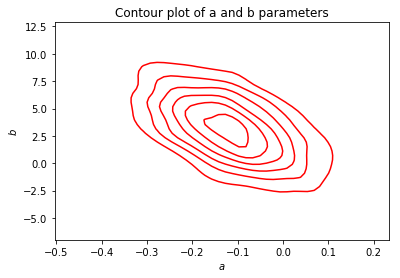

In [49]:
from scipy.stats import kde
xS,yS=aFitSameTimes.T
kS = kde.gaussian_kde(aFitSameTimes.T)
nbins=50
xiS, yiS = np.mgrid[xS.min():xS.max():nbins*1j, yS.min():yS.max():nbins*1j]
ziS = kS(np.vstack([xiS.flatten(), yiS.flatten()]))

plt.contour(xiS, yiS, ziS.reshape(xiS.shape), colors='r', zorder=15, alpha=1.0)


plt.title('Contour plot of a and b parameters')

plt.xlabel('$a$')
plt.ylabel('$b$')
plt.show()

In [50]:
pars300 = aFitSameTimes
low,med,hi = np.percentile(pars300, [16, 50, 84], axis=0)
upper, lower = hi-med, med-low

disp_str = ""
for i,name in enumerate(['a_.3', 'b_.3']):
        fmt_str = '{name}={val:.2f}^{{+{plus:.2f}}}_{{-{minus:.2f}}}'
        disp_str += fmt_str.format(name=name, val=med[i], plus=upper[i], minus=lower[i])
        disp_str += r'\quad '

disp_str = "${}$".format(disp_str)
display.Latex(data= disp_str)

<IPython.core.display.Latex object>

In [ ]:
class ReciprocalModel(object):
        
        def __init__(self, x, y, err_upper, err_lower):
            # store data as attributes of object
            
            self.x = np.asarray(x)
            self.y = np.asarray(y)
            self.err_upper = np.asarray(err_upper)
            self.err_lower = np.asarray(err_upper)
            
        def ln_likelihood(self, pars):
            # takes in pars array of form [a,b]
            
            N = len(self.y)
            dy = self.y - decay_model(pars, self.x)
            ivar = 1 / self.y

In [48]:

def f_model(pars, x):
    # pars is an array [a,b] to fit our function's form.
    # function form: f = a/x^2 + b
    return -1*pars[0]*(1/np.array(x)) + pars[1]

def weighted_squared_deviation(pars, x, y, y_err):
    chi = (y - line_model(pars, x)) / y_err
    return np.sum(chi**2)

_pars = [0, 0]
x = distarray
y_300 = netcounts_300
yerr300 = yerr_300
yerr2000 = yerr_2000
y_2000 = netcounts_2000

In [49]:
def leastsquares(x, y, yerr):
    X = np.vander(x, N=2, increasing=True)
    #Cov = np.zeros((len(yerr1), (len(yerr1))))
    #np.fill_diagonal(Cov, yerr1**2)
    Cov = np.diag(yerr**2)
    Covinv = np.linalg.inv(Cov)
    best_pars = np.linalg.inv(X.T @ Covinv @ X) @ (X.T @ Covinv @ y)
    pars_Cov = np.linalg.inv(X.T @ Covinv @ X)
    return best_pars,pars_Cov

In [51]:
bestpars,parscov = leastsquares(x, y_300, yerr300)

array([-1.14223809,  1.19763598])

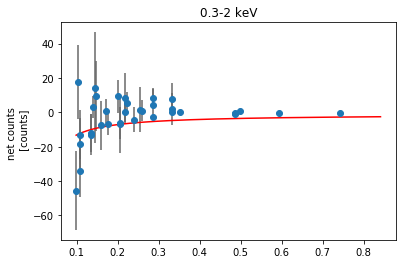

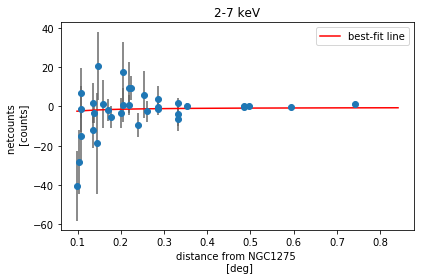

array([[ 0.33927932, -0.5657304 ],
       [-0.5657304 ,  0.96539871]])

In [90]:
fig1 = plt.figure()                # create common figure
fig2 = plt.figure()
bestpars300,parscov300 = leastsquares(x, y_300, yerr300)     # for .3-2 keV
bestpars2000,parscov2000 = leastsquares(x, y_2000, yerr2000) # for 2-7 keV

ax1 = fig1.add_subplot(111)
ax1.errorbar(x, y_300, yerr300, linestyle="none", marker='o', ecolor='#666666', label='$0.3-2.0 keV$')
x_grid = np.linspace(x.min(), x.max()+0.1, 128)
ax1.plot(x_grid, f_model(bestpars300[::-1], x_grid), marker='', linestyle='-', color='r', label='best-fit line')


ax2 = fig2.add_subplot(111)
ax2.errorbar(x, y_2000, yerr2000, linestyle='none', marker='o', ecolor='#666666')
ax2.plot(x_grid, f_model(bestpars2000[::-1], x_grid), marker='', linestyle='-', color='r', label='best-fit line')

ax1.set_title('0.3-2 keV')
#ax1.set_xlabel('distance from NGC1275 \n [deg]')
ax1.set_ylabel('net counts \n [counts]')


ax2.set_title('2-7 keV')
ax2.set_xlabel('distance from NGC1275 \n [deg]')
plt.ylabel('netcounts \n [counts]')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

parscov300